In [68]:
import os
import sys

repository_path = r"/home/emmanuel/EQviewer"  ##change this path where is located the main directory
rep_data = os.path.join("..","data")
rep_out = os.path.join("..","outs")
sys.path.insert(0,repository_path)

# Station

In this nothebook, you will see some examples to manipulate the Station object. You also will learn how to use it to plot it in your map.

In [69]:
import pandas as pd
from EQViewer.eqviewer import Station,BasePlot,BaseText

Station object receives a dataframe as input. We are going to load some stations saved in [stations.csv](https://github.com/ecastillot/EQViewer/blob/master/data/stations/stations.csv)  taken from [NC: USGS Northern California Network](https://www.fdsn.org/networks/detail/NC/)

In [70]:
stationpath = os.path.join(rep_data,"stations","stations.csv")
df = pd.read_csv(stationpath)
df

station   latitude   longitude
0       AAR  39.275936 -121.026962
1       AAS  38.430138 -121.109589
2       ABJ  39.165771 -121.192993
3       ABR  39.138126 -121.488167
4       ADW  38.438957 -120.849380
..      ...        ...         ...
925     VRC  42.329449 -122.227692
926     VSP  42.341637 -121.949905
927     VWB  43.913666 -121.554497
928     WMP  35.640587 -118.785698
929    WWVB   0.000000    0.000000

[930 rows x 3 columns]

You can define how do you want to plot the Station object in your map. Take in mind the next tips:

 - BasePlot helps us with this task, it receives [pygmt.plot](https://www.pygmt.org/latest/api/generated/pygmt.Figure.plot.html) parameters, the only difference is in the size parameter. BasePlot receives it as lambda function to transform the size. Take a look in the  [Example No.3: With colobar and diferent size of 3_catalog.ipynb.](https://github.com/ecastillot/EQviewer/blob/master/examples/3_catalog.ipynb)
 - BaseText saves some arguments from [pygmt.Figure.text](https://www.pygmt.org/latest/api/generated/pygmt.Figure.text.html) to plot the name of the stations.


When we print the Station object, it shows us the number of stations.

In [71]:
station = Station(data = df,
                baseplot=BasePlot(color="green",
                            label="stations",
                            transparency = 0,
                            style="i0.3c",
                            pen="black"),
                basetext = BaseText(font="10p,Helvetica,black",
                                    fill=None,
                                    offset="-0.05c/0.15c"))
print(station)

Station | 930 stations


Or you can print more detail information.

In [72]:
print(station.__str__(True))

Station | 930 stations
	region: [-124.34, 0.0, 0.0, 43.91]


There are some util functions. For instance, filter stations by the region

In [73]:
filter_domain=[-123.0970,-122.6902,38.6480,38.8972] 
pol2filter = [(filter_domain[0],filter_domain[2]),
                (filter_domain[0],filter_domain[3]),
                (filter_domain[1],filter_domain[3]),
                (filter_domain[1],filter_domain[2]),
                (filter_domain[0],filter_domain[2])
                ]
station.filter_region(polygon=pol2filter)
print(station.__str__(True))

Station | 19 stations
	region: [-123.01, -122.71, 38.7, 38.9]


Plot your Station object in a map.

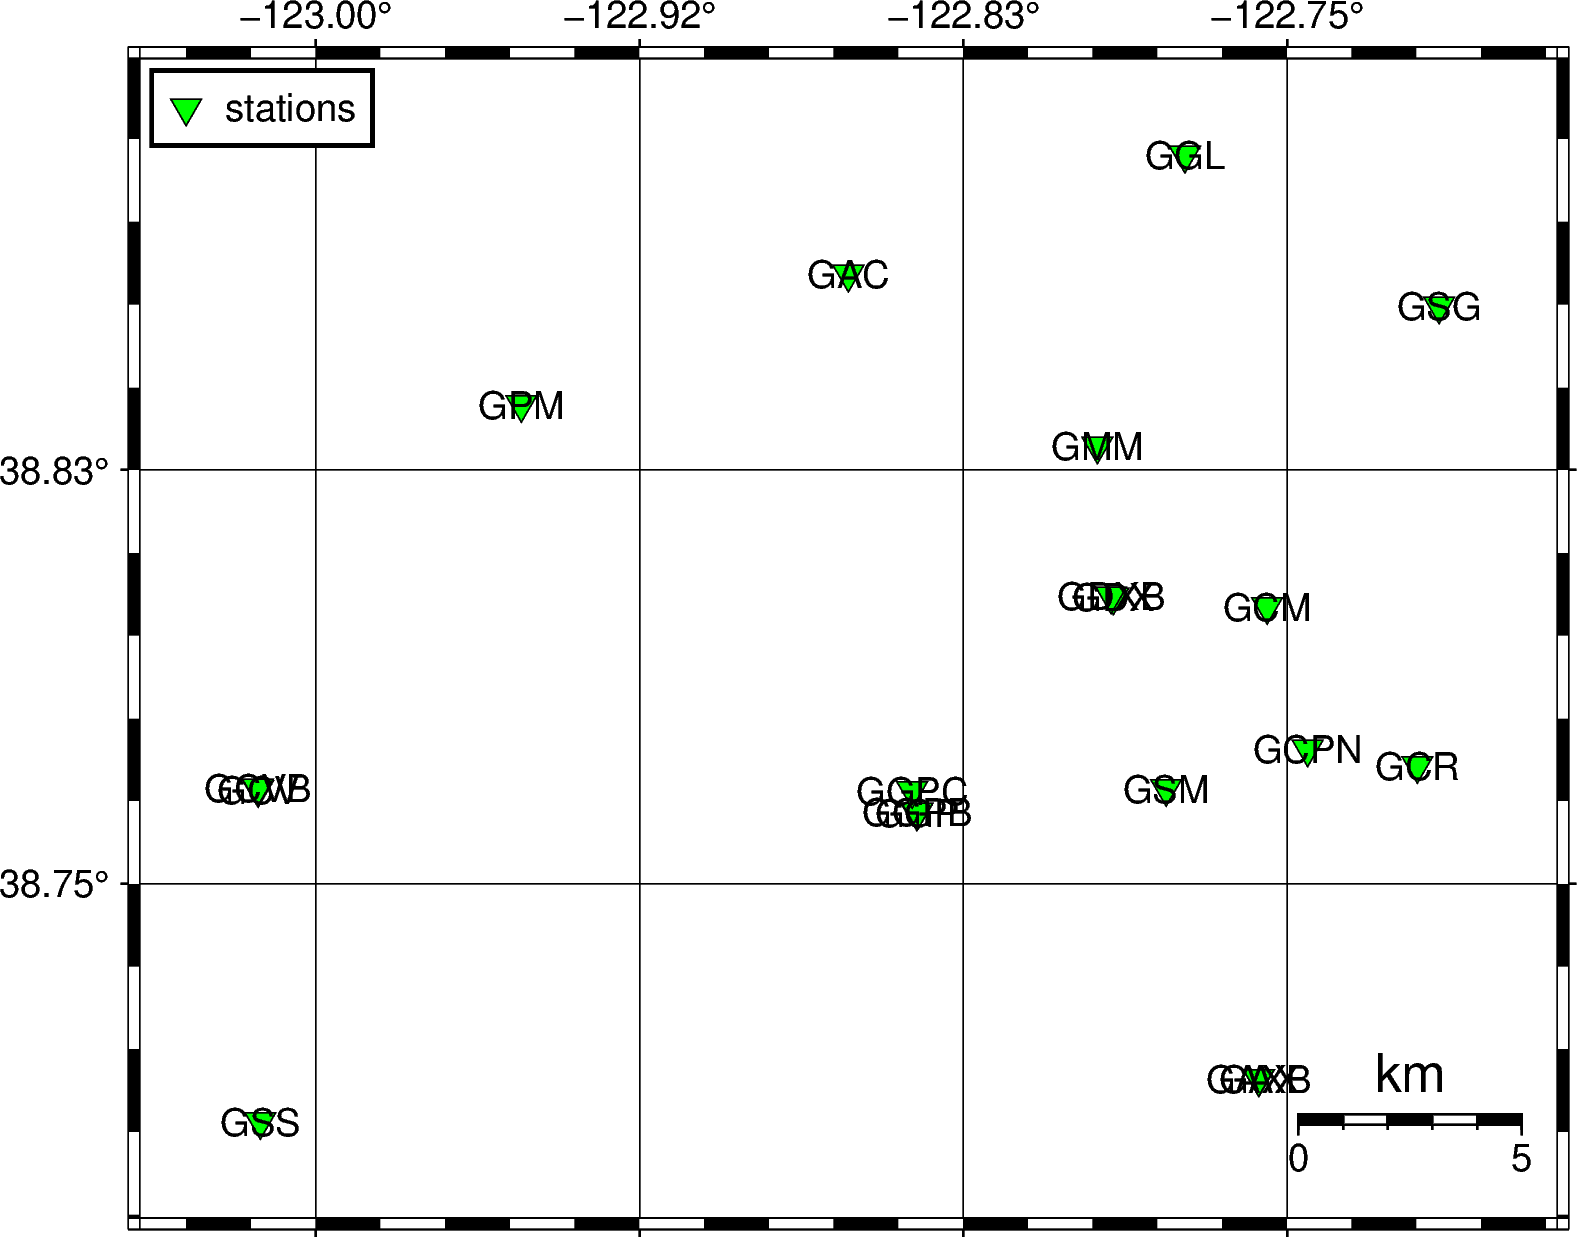

In [74]:
fig = station.plot_map()
fig.basemap(map_scale=f"jBR+o0.3c/0.7c+w{5}k+f+lkm+at")
fig.legend(position=f"jTL+o0.1c",box='+gwhite+p1p')
fig.show()

Or you can plot it in a high resolution map. 

- We are going to take the region limits calculated in the shape object, but you can specify the region you want.
- We also are going to plot the faults with different color and style
- We don't plot the station names

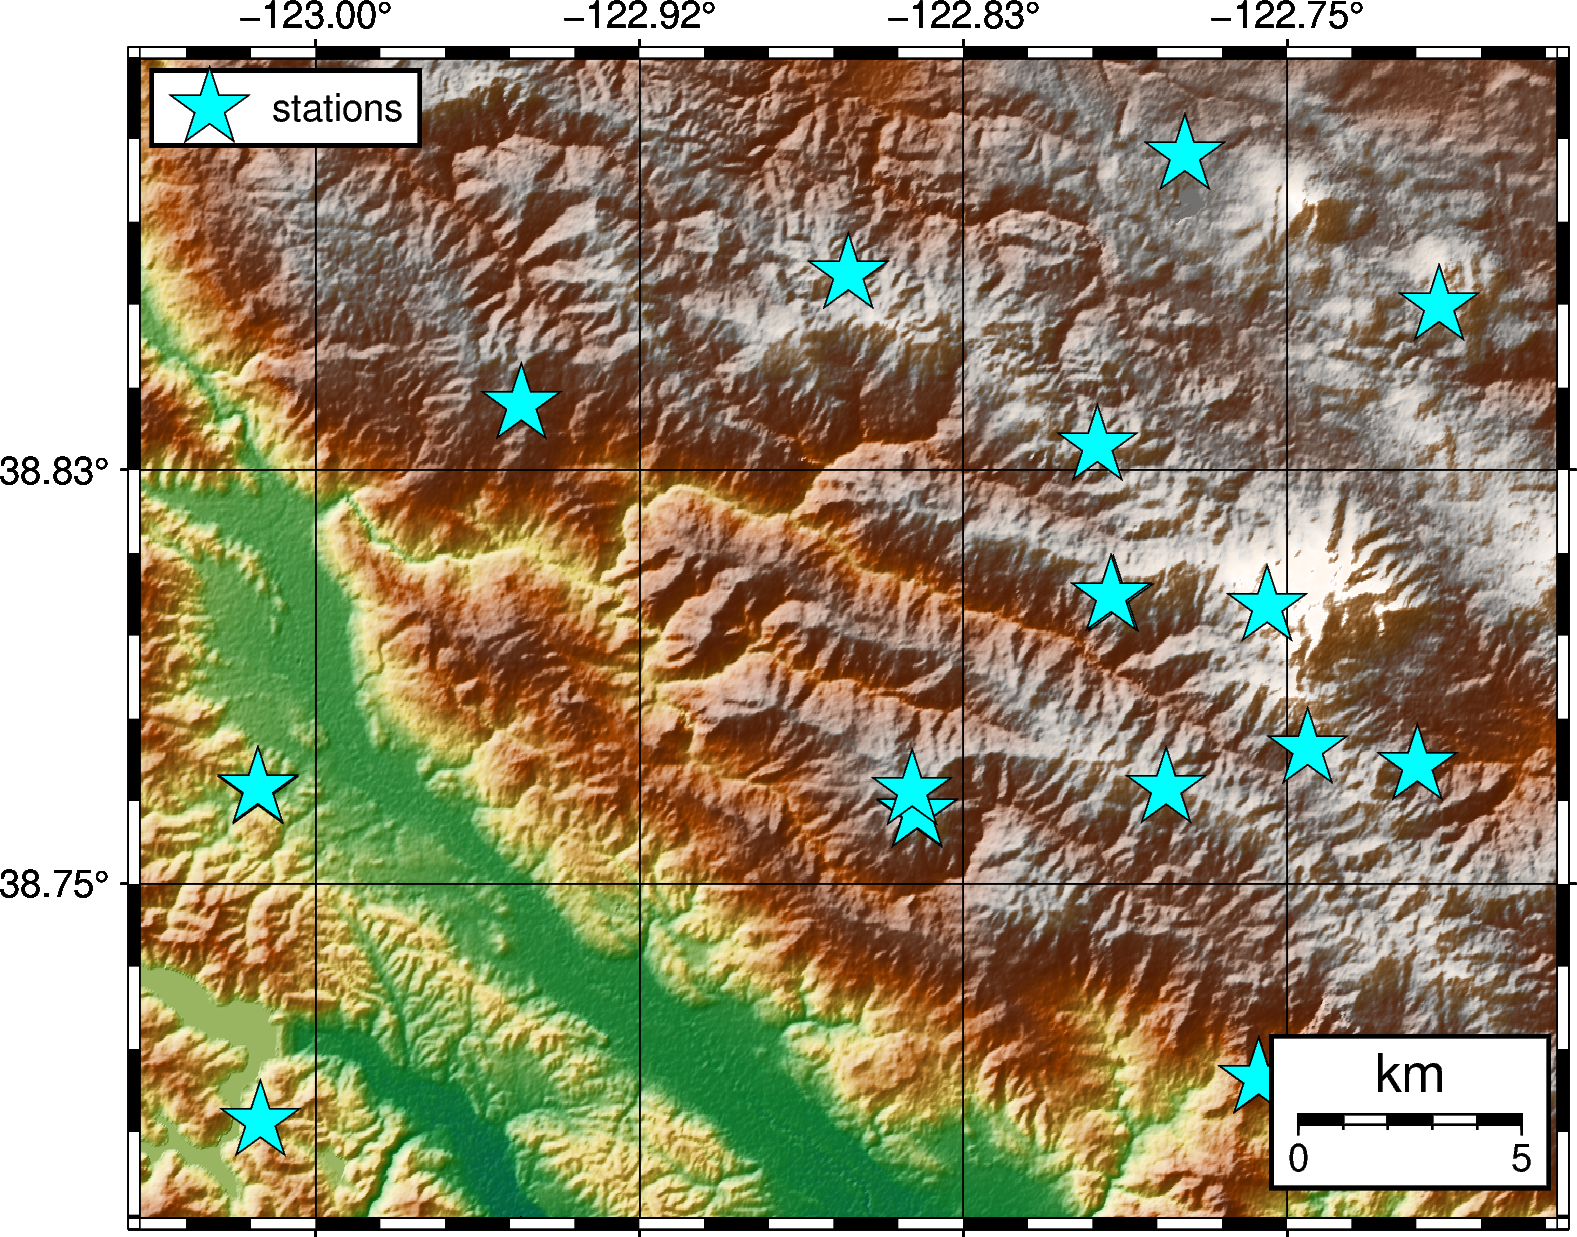

In [75]:
import pygmt

faults_region = station.get_region(padding=0.1)
station.baseplot.style = "a0.7c"
station.baseplot.color = "cyan"
station.basetext = None

fig = pygmt.Figure() 
fig.basemap(region=faults_region,
            projection="M12c", 
            frame=["af","WNse"])
fig.grdimage(
            '@earth_relief_01s', #01m resolution 
            cmap=True,
            shading=True,
            frame=["afg","WNse"]
        )
fig.coast(
            # land="gray",
            shorelines=True,
            borders='1/1p,black',
            frame=["afg","WNse"],
        )
fig = station.plot_map(fig)
fig.basemap(map_scale=f"jBR+o0.3c/0.7c+w{5}k+f+lkm+at",box='+gwhite+p1p')
fig.legend(position=f"jTL+o0.1c",box='+gwhite+p1p')
fig.show()

# MulStation

MulStation refers to multiple Station objects. It receives a list of Station objects and inheridate every method.

In [76]:
from EQViewer.eqviewer import MulStation

We will use different stations to instance MulStation

In [77]:
filter_domain=[-122.92462,-122.76703,38.74915,38.88327]
pol2filter = [(filter_domain[0],filter_domain[2]),
                (filter_domain[0],filter_domain[3]),
                (filter_domain[1],filter_domain[3]),
                (filter_domain[1],filter_domain[2]),
                (filter_domain[0],filter_domain[2])
                ]
station1 = station.copy()
station1.filter_region(polygon=pol2filter)
station1.baseplot.style = "a0.7c"
station1.baseplot.color = "cyan"
station1.label = "cyan"

filter_domain=[-122.76647,-122.65638,38.74915 ,38.85847] 
pol2filter = [(filter_domain[0],filter_domain[2]),
                (filter_domain[0],filter_domain[3]),
                (filter_domain[1],filter_domain[3]),
                (filter_domain[1],filter_domain[2]),
                (filter_domain[0],filter_domain[2])
                ]
station2 = station.copy()
station2.filter_region(polygon=pol2filter)
station2.baseplot.style = "i0.3c"
station2.baseplot.color = "red"
station2.label = "red"

filter_domain=[-122.75026,-122.56920,38.68506 ,38.80840]  
pol2filter = [(filter_domain[0],filter_domain[2]),
                (filter_domain[0],filter_domain[3]),
                (filter_domain[1],filter_domain[3]),
                (filter_domain[1],filter_domain[2]),
                (filter_domain[0],filter_domain[2])
                ]
station3 = station.copy()
station3.filter_region(polygon=pol2filter)
station3.baseplot.style = "n0.7c"
station3.baseplot.color = "seagreen"
station3.label = "seagreen"

mulstation = MulStation(stations=[station1,station2,station3])
print(mulstation)

Stations (3 stations)
----------------------
1. Station | 8 stations
2. Station | 3 stations
3. Station | 2 stations


Plot your mulstation object in a map.

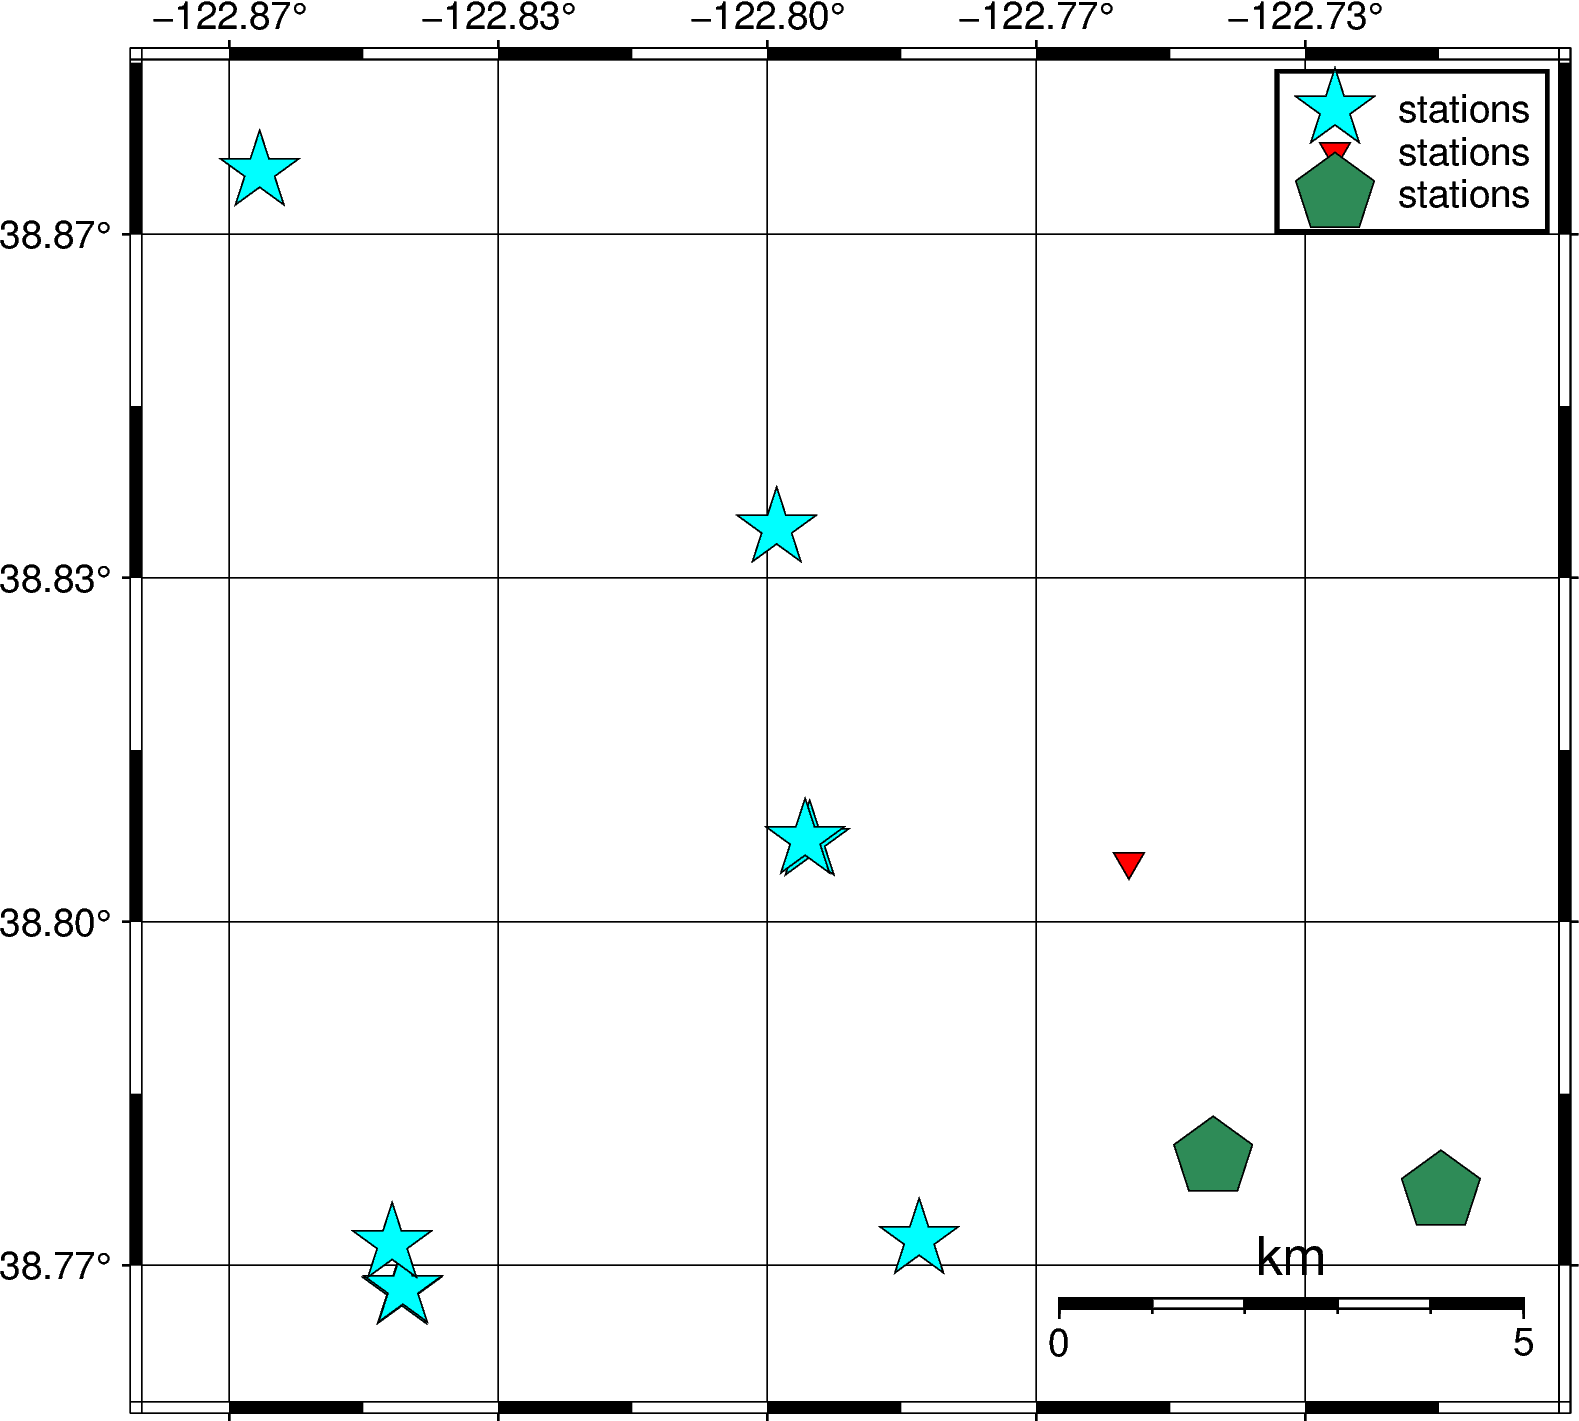

In [78]:
fig = mulstation.plot_map()
fig.basemap(map_scale=f"jBR+o0.3c/0.7c+w{5}k+f+lkm+at")
fig.legend(position=f"jTR+o0.1c",box='+gwhite+p1p')
fig.show()

Or you can plot it in a high resolution map. 

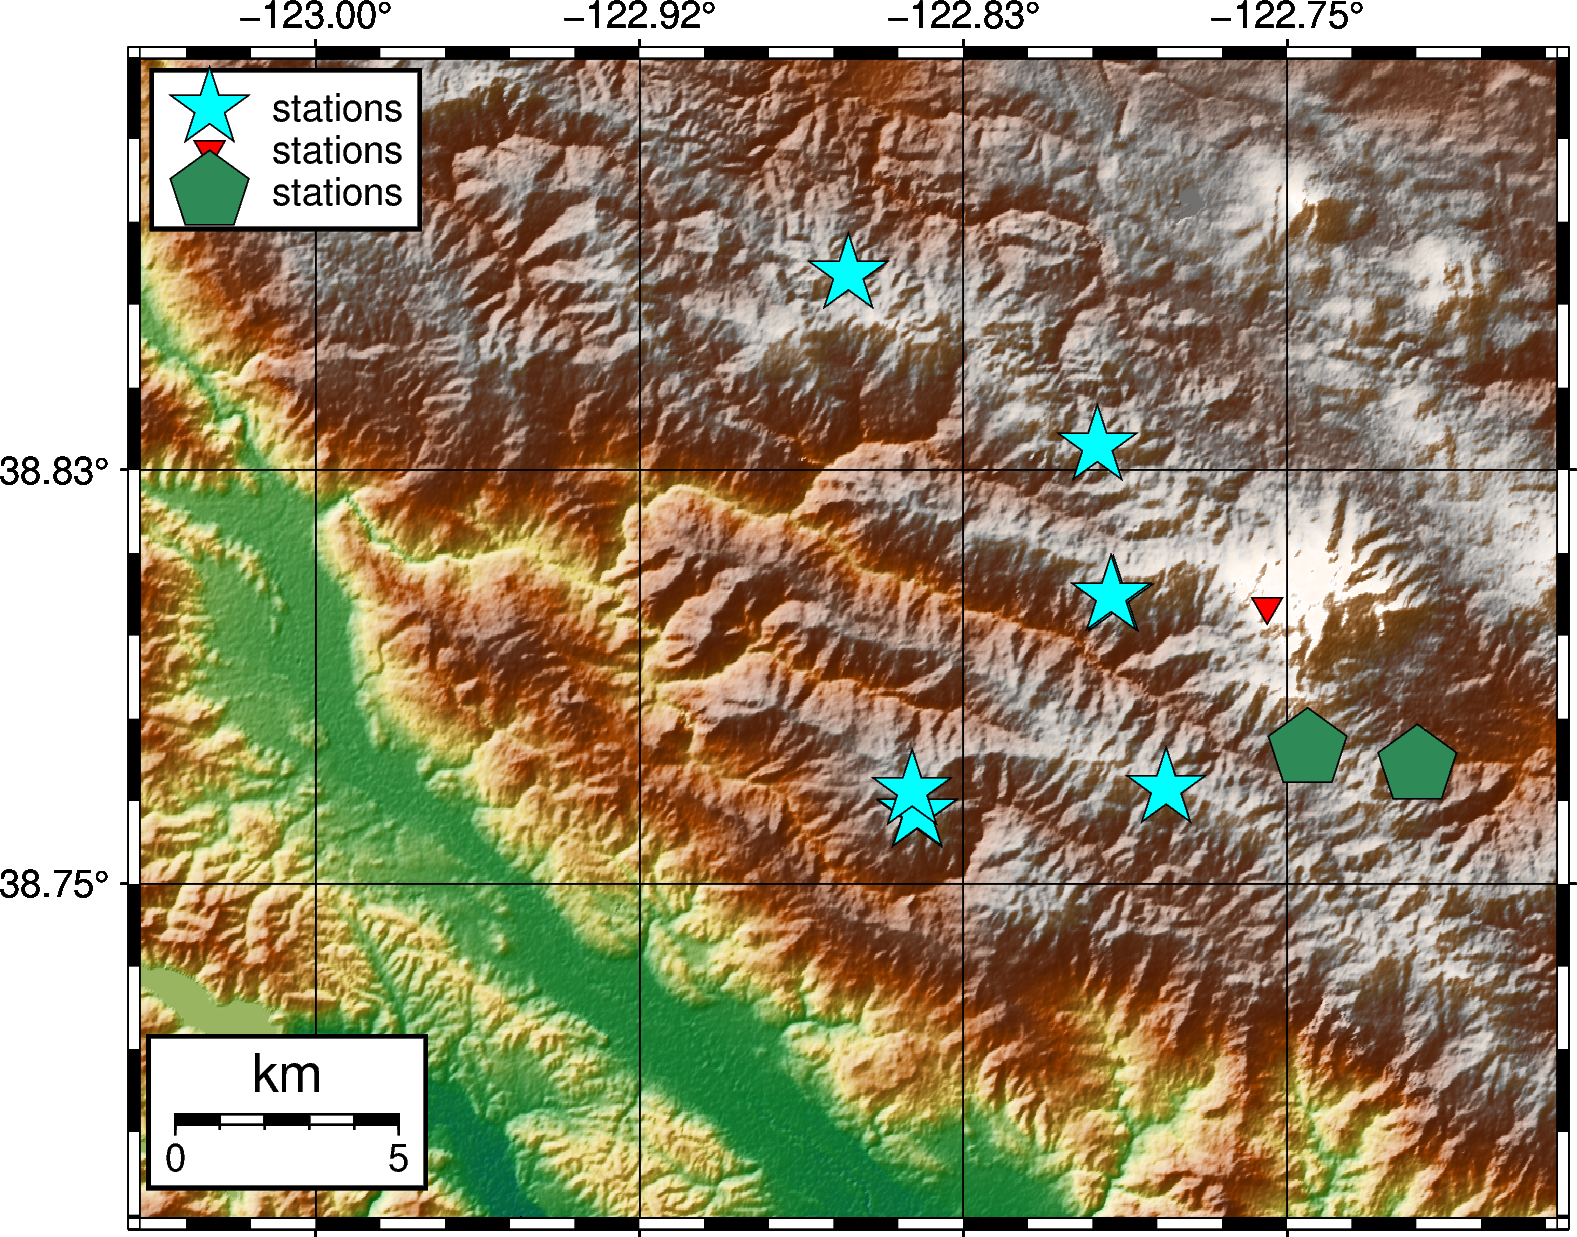

In [79]:
import pygmt

faults_region = station.get_region(padding=0.1)
station.baseplot.pen = "0.08c,red"

fig = pygmt.Figure() 
fig.basemap(region=faults_region,
            projection="M12c", 
            frame=["af","WNse"])
fig.grdimage(
            '@earth_relief_01s', #01m resolution 
            cmap=True,
            shading=True,
            frame=["afg","WNse"]
        )
fig.coast(
            shorelines=True,
            borders='1/1p,black',
            frame=["afg","WNse"],
        )
fig = mulstation.plot_map(fig)
fig.basemap(map_scale=f"jBL+o0.3c/0.7c+w{5}k+f+lkm+at",box='+gwhite+p1p')
fig.legend(position=f"jTL+o0.1c",box='+gwhite+p1p')
fig.show()

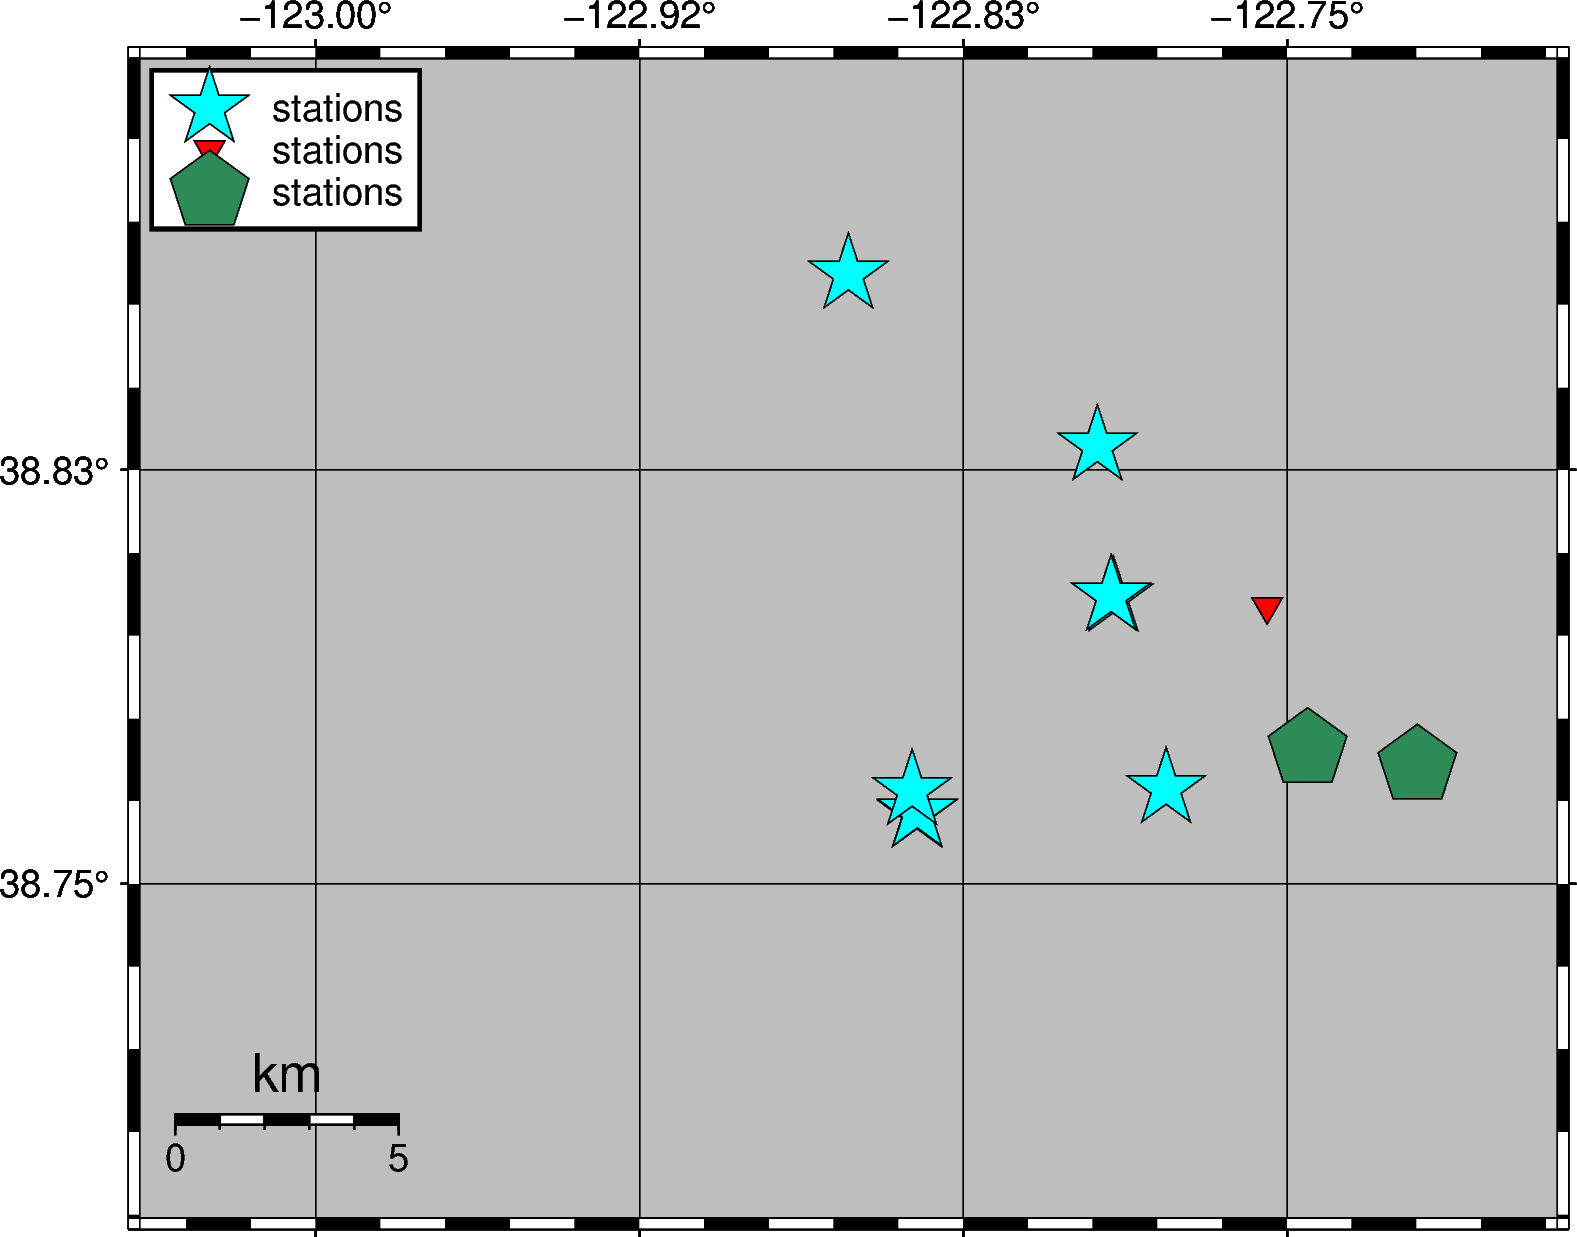

In [80]:
import pygmt

faults_region = station.get_region(padding=0.1)
station.baseplot.pen = "0.08c,red"

fig = pygmt.Figure() 
fig.basemap(region=faults_region,
            projection="M12c", 
            frame=["af","WNse"])
fig.coast(
            land="gray",
            water="lightblue",
            shorelines=True,
            borders='1/1p,black',
            frame=["afg","WNse"],
        )
fig = mulstation.plot_map(fig)
fig.basemap(map_scale=f"jBL+o0.3c/0.7c+w{5}k+f+lkm+at")
fig.legend(position=f"jTL+o0.1c",box='+gwhite+p1p')
fig.show()